<a href="https://colab.research.google.com/github/calebmckay1/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# added daily objective for clarity.
# feel like I've got the objectives for today down. Probably not unconciously yet
# liked I'd still have to reference material for the last objective but everything
# else I feel like I've got it so far.
# let me know if there's anything I can improve on

At the end of this module, you should be able to:
- identify misleading visualizations and how to fix them.
- use appropriate terminology when referring to parts of a Matplotlib graph
- differentiate between Matplotlib syntaxes
- use Matplotlib to control basic visual aspects of their plot so as to mimic popular plotting styles (FiveThirtyEight) including: plot, plot stylesheet, title, subtitle, axis labels, axis tick marks, background colors, text annotations.

In [0]:
import pandas as pd

In [7]:
df = pd.DataFrame({'a': [1,3,2,4,3,5], 'b':[3,5,4,6,5,7]})
df.head()

,a,b
0,1,3
1,3,5
2,2,4
3,4,6
4,3,5


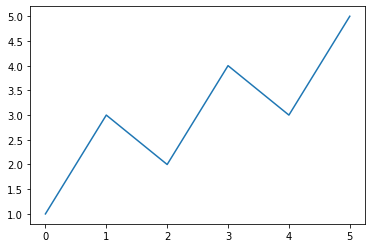

In [18]:
df['a'].plot(); # plotting the 'a' column directly from pandas without labels

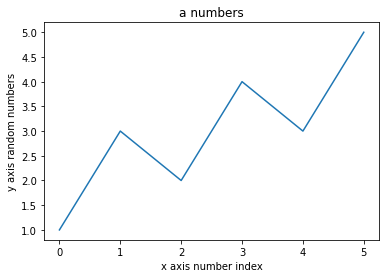

In [19]:
import matplotlib.pyplot as plt

plt.plot(df['a']) # plot the dataframe column 'a' using matplotlib
plt.title('a numbers') # title of the graph
plt.xlabel('x axis number index') # x axis label
plt.ylabel('y axis random numbers') # y axis label
plt.show() # show the graph with the above parameters

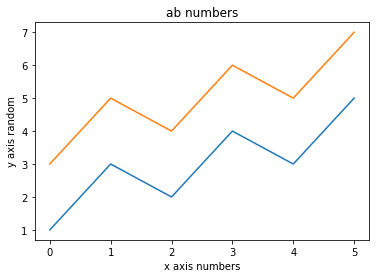

In [20]:
plt.plot(df['a']) 
plt.plot(df['b']) # added the 'b' column into the graph also
plt.title('ab numbers') 
plt.xlabel('x axis numbers') 
plt.ylabel('y axis random') 
plt.show()

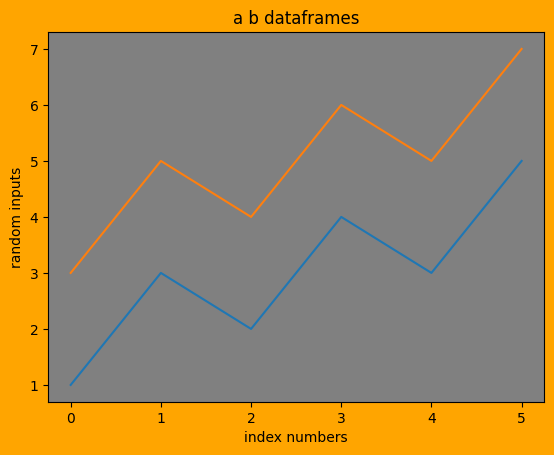

In [27]:
fig, ax = plt.subplots()

ax.plot(df['a']) #  plotting 'a' column
ax.plot(df['b']) # plotting 'b' column

fig.patch.set_facecolor('orange') # using set_ to set the facecolor, figure as a whole
ax.patch.set_facecolor('gray') # setting the facecolor of the axes

# ax = axes change
# fig = change graph as a whole

ax.set_title('a b dataframes') # forgot to put set_ initially
ax.set_xlabel('index numbers')
ax.set_ylabel('random inputs')

plt.show()

In [0]:
from IPython.display import display, Image

In [29]:
the_graph = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=the_graph, width=400)

display(example)

# cool it worked, switched a few variables up and still worked out nice

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# already imported pandas previously but ended doing it again just to follow along.

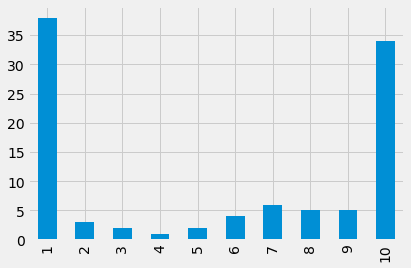

In [80]:
test = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 34], index=range(1,11))
test.plot.bar();

# range = (1,11) because we need 10 numbers on x axis and it stops 1 short.

In [32]:
display(example)

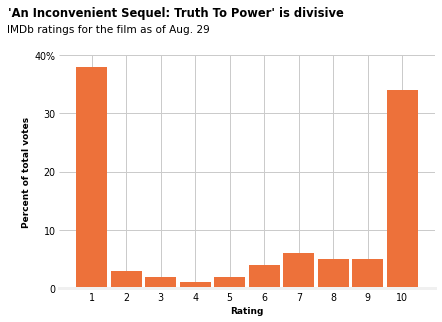

In [132]:
plt.style.use('fivethirtyeight')
# this line of code allow for selection of stylesheets


fig, ax = plt.subplots()
# already set this in a previous cell following along though


fig.patch.set_facecolor('None')
ax.patch.set_facecolor('None')
# set the facecolor to transparent


ax.bar(x=range(1,11,1), height=test, color='#ED713A', width=.9)
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", fontsize=11.5, fontweight='bold', x=.31, y=1.14)
ax.text(s='IMDb ratings for the film as of Aug. 29', y=44, x=-1.45, fontsize=10.5)
# might need additional help with these lines of code.
# height= fake had me confused but realized it's the set i made earlier
# not sure why the range is represented 1,11,"1" I'll look more into it.
# had to mess with x and y space here a few times


from matplotlib import rc
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
# tried to change font on labels but kept telling me fonts were not found

ax.set_xlabel('Rating', fontsize=9, fontweight='bold')
ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')
# set titles to the x and y axis, gave it a fontsize and made them bold.


ax.set_xticks(range(1,11,1))
ax.set_xticklabels(range(1,11,1), fontsize=9.5)
# gonna have to look into 1,11,1 just curious why that extra 1 is there.
# oh i got it now! it's counting by 1's


ax.set_yticks(range(0,41,10))
ax.set_yticklabels(['0', '10', '20', '30', '40%'], fontsize=9.5)
# realized that because this one is counting by 10's 
# the ticks makes it so the axes are spaced a specific way
# and ticklabels allows to make specific labels on each tick


ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# spines are the outside of the graph, here we're taking out the left right and top

plt.show()

In [91]:
display(example)

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [133]:
from google.colab import files
uploaded = files.upload()

# downloaded the data file and uploaded it using from google.colab import files
# uploaded = files.upload() to prompt a choose file button

Saving congress-age.zip to congress-age.zip


In [134]:
!unzip congress-age.zip
# unzipped the file

Archive:  congress-age.zip
   creating: congress-age/
  inflating: congress-age/README.md  
  inflating: congress-age/congress-terms.csv  


In [183]:
age = pd.read_csv('congress-age/congress-terms.csv')
age.head()

age2 = age[['party', 'termstart', 'age']].copy()
age2['party'].value_counts()
# created a dataframe using only needed columns

D     10290
R      8274
I        63
ID        4
AL        3
L         1
Name: party, dtype: int64

In [0]:
age2 = age2[~age2.party.str.contains('I')]
age2 = age2[~age2.party.str.contains('L')]

# made it so dataframe only contains the 2 parties

In [185]:
age2['party'].value_counts()

D    10290
R     8274
Name: party, dtype: int64

In [0]:
import seaborn as sns

In [0]:
age3 = age2.reset_index()
# reset the index. Might have to make a tidy table for this example.

In [0]:
age3['termstart'] = pd.to_datetime(age3['termstart'], infer_datetime_format=True)
# changed the columns from numbers to dates

In [0]:
age3['termstart'] = age3['termstart'].dt.year
# change it from a whole date to just the year

In [234]:
wine = age3.pivot_table(index='party', columns='termstart', values='age')
wine

# not sure how that works but it looks like it calculated the average age
# for me already. 

termstart,1947,1949,1951,1953,1955,1957,1959,1961,1963,1965,1967,1969,1971,1973,1975,1977,1979,1981,1983,1985,1987,1989,1991,1993,1995,1997,1999,2001,2003,2005,2007,2009,2011,2013
party,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
D,52.006883,51.430303,52.295890,52.258029,52.254861,53.176949,52.389607,53.410914,53.347892,52.265229,53.403822,53.452117,53.457006,53.267974,51.574790,50.649721,50.342773,50.471918,50.344375,51.459539,52.255975,52.832609,53.712689,52.971787,53.724506,53.893385,54.342471,55.272243,56.190625,57.306855,57.599313,58.440979,60.269444,59.550965
R,52.969608,54.603571,54.330268,54.088571,54.737945,55.368924,54.695385,53.923394,52.632719,52.177143,51.159912,51.729508,52.712554,51.300417,50.794709,50.206283,49.543350,48.310400,49.679018,50.536134,51.291150,52.486607,53.992558,52.986842,51.781034,52.346853,53.983154,54.191007,54.686833,55.758076,56.933074,56.860619,55.296587,55.782332


In [271]:
wine1 = wine.reset_index()
wine1

termstart,party,1947,1949,1951,1953,1955,1957,1959,1961,1963,1965,1967,1969,1971,1973,1975,1977,1979,1981,1983,1985,1987,1989,1991,1993,1995,1997,1999,2001,2003,2005,2007,2009,2011,2013
0,D,52.006883,51.430303,52.295890,52.258029,52.254861,53.176949,52.389607,53.410914,53.347892,52.265229,53.403822,53.452117,53.457006,53.267974,51.574790,50.649721,50.342773,50.471918,50.344375,51.459539,52.255975,52.832609,53.712689,52.971787,53.724506,53.893385,54.342471,55.272243,56.190625,57.306855,57.599313,58.440979,60.269444,59.550965
1,R,52.969608,54.603571,54.330268,54.088571,54.737945,55.368924,54.695385,53.923394,52.632719,52.177143,51.159912,51.729508,52.712554,51.300417,50.794709,50.206283,49.543350,48.310400,49.679018,50.536134,51.291150,52.486607,53.992558,52.986842,51.781034,52.346853,53.983154,54.191007,54.686833,55.758076,56.933074,56.860619,55.296587,55.782332


In [293]:
wine2 = wine1.melt(id_vars=['party'])
wine3 = wine2.set_index('termstart')
wine3

,party,value
termstart,,
1947,D,52.006883
1947,R,52.969608
1949,D,51.430303
1949,R,54.603571
1951,D,52.295890
...,...,...
2009,R,56.860619
2011,D,60.269444
2011,R,55.296587


In [0]:
wine_dine = wine3[wine3['party'] == 'D']
wine_rine = wine3[wine3['party'] == 'R']

# not really sure how I even did all this up to this point.
# took me an hour or two. Feel like I'm doing a lot of this mostly on luck
# and a lot of trial and error and thinking. I'm probably making it harder
# than it's supposed to be lol

In [137]:
from google.colab import files
uploaded1 = files.upload()
# uploaded the screenshot of the plot

Saving Screen Shot 2020-05-07 at 6.14.19 PM.png to Screen Shot 2020-05-07 at 6.14.19 PM.png


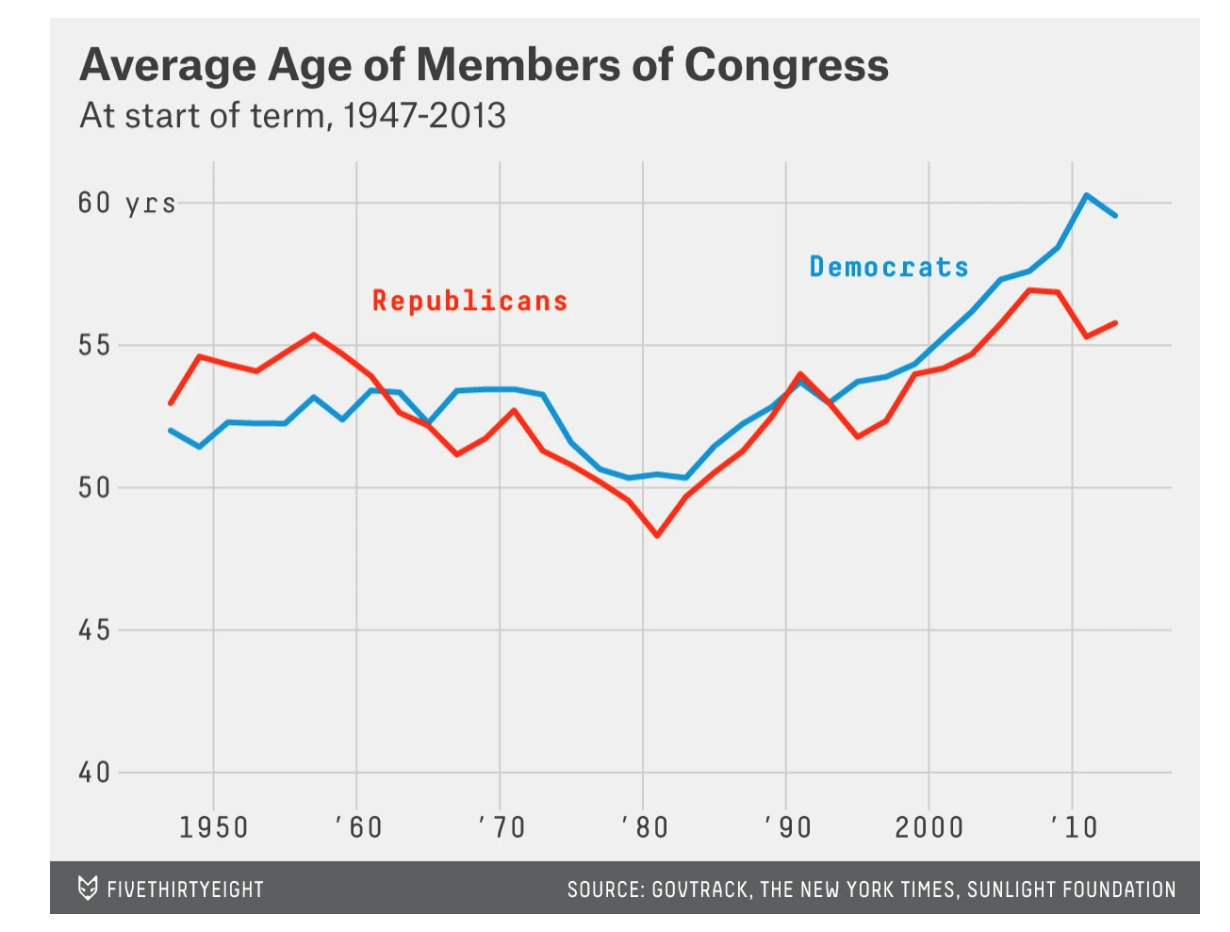

In [366]:
from IPython.display import display, Image
pic = Image('Screen Shot 2020-05-07 at 6.14.19 PM.png', width=450)
display(pic)

# displayed the screenshot previously uploaded for reference

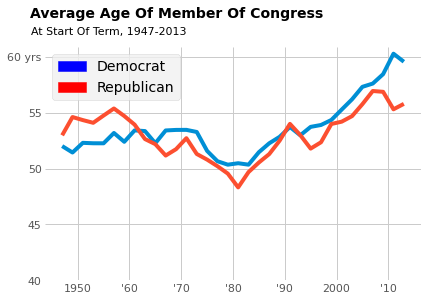

In [393]:
import matplotlib.patches as mpatches
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

ax.plot(wine_dine['value'])
ax.plot(wine_rine['value'])


fig.patch.set_facecolor('None')
ax.set_facecolor('None')

ax.set_title('Average Age Of Member Of Congress', fontsize=14, fontweight='bold', x=.35, y=1.1)
ax.text(s='At Start Of Term, 1947-2013', y=62, x=1941, fontsize=11)


ax.set_xticks(range(1950,2011,10))
ax.set_xticklabels(['1950', "'60","'70","'80","'90","2000","'10"], fontsize=11)


ax.set_yticks(range(40,61,5))
ax.set_yticklabels(['40', '45', '50', '55', '60 yrs'], fontsize=11)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

repub = mpatches.Patch(color='red', label= 'Republican')
dem = mpatches.Patch(color='blue', label='Democrat')

plt.legend(handles=[dem, repub])

plt.show()

# whew! Got this far now we just gotta touch it up.

# well I've tried every similar looking color to try to match but everything 
# was way too dark. Tried different style sheets too, nothing really seemed to
# match. Created a legend also, assumed they made their labels in PS. 

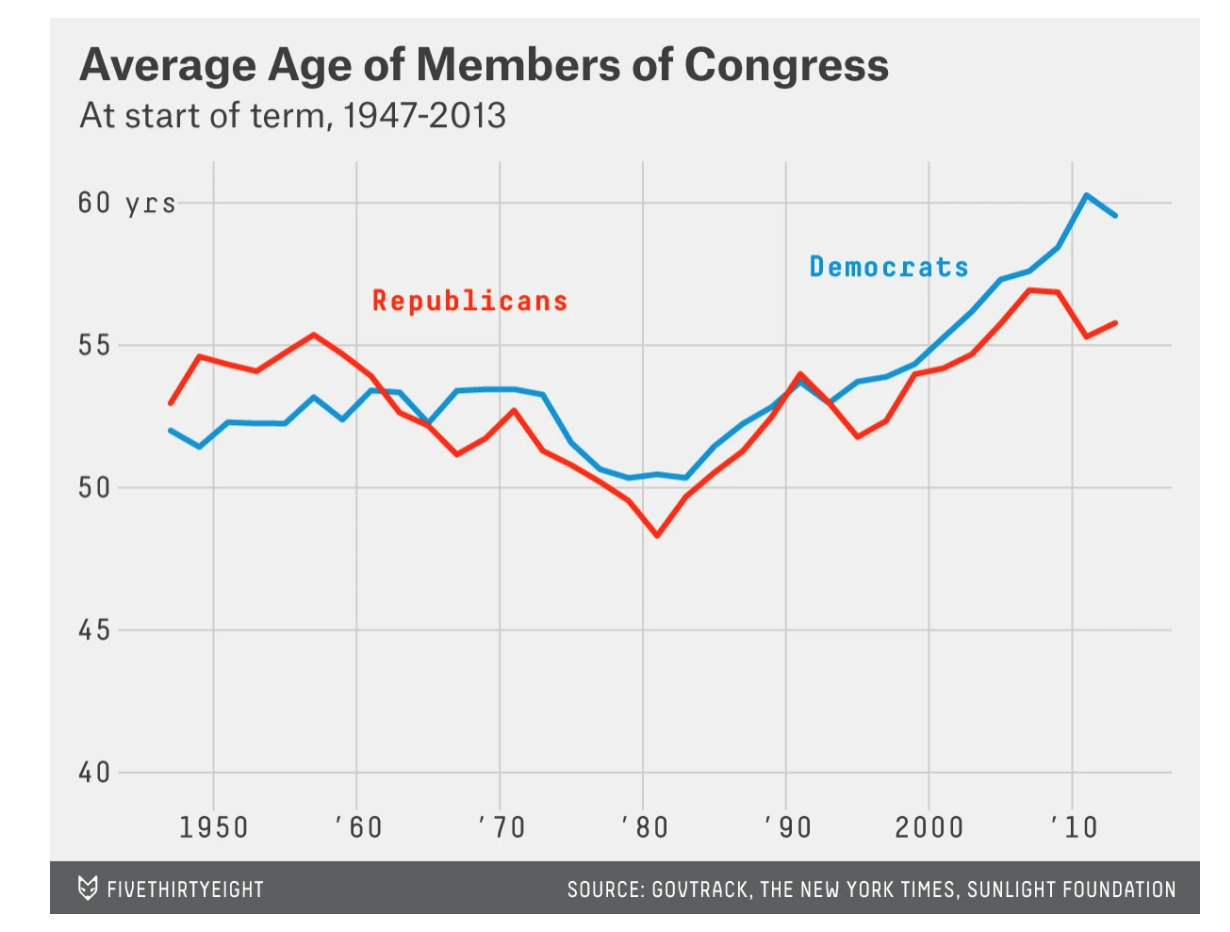

In [394]:
display(pic)

# pretty close, just color scheme and line thickness, a few other things, especially 
# that '60 yrs' part how its sticking out like that, really stumped on how 
# to pull that in

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here